In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
classes=np.unique(y_train)
nclasses=len(classes)
nclasses

10

In [9]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
curr_img = np.reshape(x_train[3],(28,28))
fig=px.imshow(curr_img)
fig.show()


In [11]:
x_train=x_train/255.0
x_train_flat=x_train.reshape(-1,28*28)
x_test=x_test/255.0
x_test_flat=x_test.reshape(-1,28*28)


In [12]:
feat_cols=['pixel'+str(i+1) for i in range(x_train_flat.shape[1])]

In [13]:
x_train=pd.DataFrame(x_train_flat,columns=feat_cols)

In [14]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
x_test=pd.DataFrame(x_test_flat,columns=feat_cols)
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1008
           1       0.96      0.96      0.96      1137
           2       0.85      0.87      0.86      1008
           3       0.86      0.83      0.85      1042
           4       0.87      0.87      0.87       989
           5       0.84      0.84      0.84       891
           6       0.89      0.90      0.90       944
           7       0.90      0.91      0.91      1012
           8       0.81      0.82      0.81       962
           9       0.85      0.85      0.85      1007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [18]:
print(classification_report(dt.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_train_pca_10=pca.fit_transform(x_train)
x_test_pca_10=pca.transform(x_test)

In [20]:
df_train=pd.DataFrame(data=x_train_pca_10,columns=['PCA'+str(i+1) for i in range(10)])
df_train

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.486010,-1.226176,-0.096126,-2.179450,-0.107043,-0.911610,0.916115,0.626674,-1.425263,0.776076
1,3.967523,-1.156300,2.338584,-1.806911,-3.244247,-0.713542,-0.175512,-0.411217,0.159326,0.593542
2,-0.203332,1.537936,-0.739261,2.043194,-1.202682,-0.007244,-3.367206,1.445591,-0.448965,-0.697979
3,-3.133832,-2.381166,1.073143,0.415203,-0.007262,2.743745,-1.857931,-0.263893,1.186801,0.042971
4,-1.501000,2.864875,0.064127,-0.947828,0.384944,0.169497,-0.358535,-1.590532,0.884364,0.409539
...,...,...,...,...,...,...,...,...,...,...
59995,-0.390674,-1.150884,0.533104,-1.361264,1.193212,0.929402,-1.954859,-0.930495,-1.940029,1.256175
59996,0.599050,-2.697647,-0.348758,-2.549083,0.778091,0.724579,-1.910489,1.980842,-2.623920,0.107048
59997,-0.698249,0.627754,-1.010245,-2.802571,-0.824716,-1.813546,-1.823722,-0.726466,-0.344543,1.049600
59998,0.512181,-0.021930,2.015132,1.343928,-2.043782,-2.119811,-0.421440,0.551530,-0.065573,-0.368495


In [21]:
dt2=DecisionTreeClassifier()
dt2.fit(x_train_pca_10,y_train)
y_pred_pca_10=dt2.predict(x_test_pca_10)

In [22]:
print(classification_report(y_pred_pca_10,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       975
           1       0.97      0.96      0.96      1143
           2       0.84      0.85      0.85      1021
           3       0.78      0.77      0.78      1025
           4       0.77      0.78      0.77       973
           5       0.76      0.74      0.75       921
           6       0.89      0.89      0.89       958
           7       0.85      0.87      0.86      1005
           8       0.74      0.76      0.75       951
           9       0.75      0.74      0.74      1028

    accuracy                           0.83     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.83      0.83      0.83     10000



In [23]:
print(classification_report(dt2.predict(x_train_pca_10),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [24]:
##

Cross Validation & Hyper Parameters Tuning

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [26]:
df=pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 36\insurance (1).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df['weight_status']=np.where(df['bmi']<18.000 , 'underweight',
                             np.where(df['bmi']<25.000,'normal',
                                      np.where(df['bmi']<30.000 , 'overweight','obese')))
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [29]:
cats=['sex','smoker','region','weight_status']
nums=['age','bmi','children','charges']

In [30]:
df[cats].describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364
weight_status,1338,4,obese,707


In [31]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


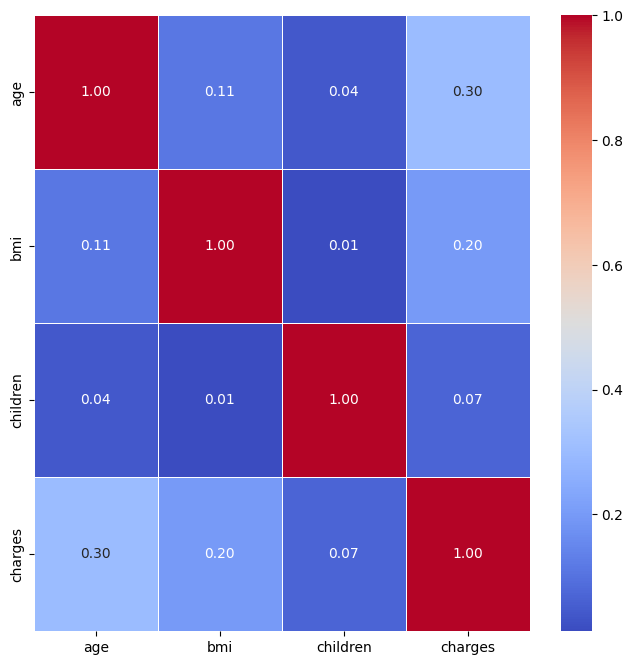

In [33]:
# Filter out only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap with annotations and a specific format
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')

# Display the plot
plt.show()

In [34]:
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

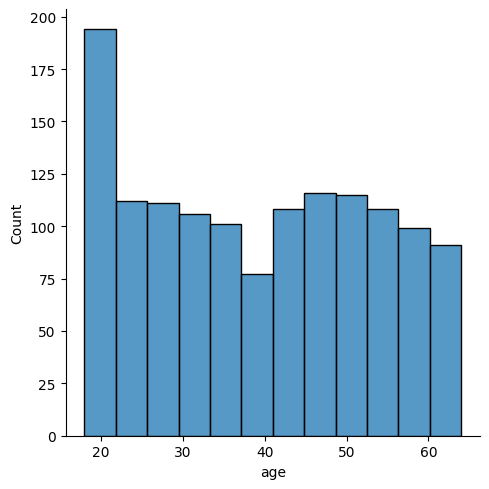

In [35]:
sns.displot(x='age',data=df)

In [36]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
df[['age']]=median_imputer.fit_transform(df[['age']])

In [37]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [38]:
df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)

In [39]:
df.duplicated().sum()

1

In [40]:
df=df.drop_duplicates()

In [41]:
df['smoker']=df['smoker'].replace({'yes':1,'no':0})
df['sex']=df['sex'].replace({'female':0,'male':1})

C:\Users\Hamed\AppData\Local\Temp\ipykernel_17144\1399181397.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamed\AppData\Local\Temp\ipykernel_17144\1399181397.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19.0,0,27.900,0,1,southwest,16884.92400,overweight
1,18.0,1,33.770,1,0,southeast,1725.55230,obese
2,28.0,1,33.000,3,0,southeast,4449.46200,obese
3,33.0,1,22.705,0,0,northwest,21984.47061,normal
4,32.0,1,28.880,0,0,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,northwest,10600.54830,obese
1334,18.0,0,31.920,0,0,northeast,2205.98080,obese
1335,18.0,0,36.850,0,0,southeast,1629.83350,obese
1336,21.0,0,25.800,0,0,southwest,2007.94500,overweight


In [43]:
df=pd.get_dummies(df,columns=['region','weight_status'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,weight_status_normal,weight_status_obese,weight_status_overweight,weight_status_underweight
0,19.0,0,27.900,0,1,16884.92400,False,False,False,True,False,False,True,False
1,18.0,1,33.770,1,0,1725.55230,False,False,True,False,False,True,False,False
2,28.0,1,33.000,3,0,4449.46200,False,False,True,False,False,True,False,False
3,33.0,1,22.705,0,0,21984.47061,False,True,False,False,True,False,False,False
4,32.0,1,28.880,0,0,3866.85520,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,False,True,False,False,False,True,False,False
1334,18.0,0,31.920,0,0,2205.98080,True,False,False,False,False,True,False,False
1335,18.0,0,36.850,0,0,1629.83350,False,False,True,False,False,True,False,False
1336,21.0,0,25.800,0,0,2007.94500,False,False,False,True,False,False,True,False


In [44]:
x=df.drop('charges',axis=1)
y=df['charges']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [46]:
scaler=StandardScaler()

cols=['age','bmi']
scaler.fit(x_train[cols])

x_train[cols]=scaler.transform(x_train[cols])
x_test[cols]=scaler.transform(x_test[cols])

In [47]:
models={
    'lr':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor()
}




In [48]:
for model_name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model_name+'----------------------')
  print(r2_score(y_pred,y_test))
  print('--------------------')

lr----------------------
0.5720365416189468
--------------------
KNN----------------------
-0.03774941963162881
--------------------
SVR----------------------
-68325.78137125212
--------------------
DT----------------------
0.5507080543229776
--------------------
RF----------------------
0.6836303360061939
--------------------


In [49]:
for model_name,model in models.items():
  print('using: '+model_name)
  scores=cross_validate(model,x,y,cv=5,return_train_score=True,n_jobs=-1,scoring=('r2','neg_mean_squared_error'))
  print('train scores:',scores['train_r2'])
  print('test scores:',scores['test_r2'])
  print('--------')

using: lr
train scores: [0.7528663  0.76574416 0.7488206  0.7600115  0.75344807]
test scores: [0.76487101 0.70514053 0.78020066 0.737855   0.76324673]
--------
using: KNN
train scores: [0.42476337 0.44886757 0.42937008 0.41990252 0.4211826 ]
test scores: [0.15312664 0.10027398 0.01105057 0.17391726 0.162039  ]
--------
using: SVR
train scores: [-0.10019205 -0.11109184 -0.10464933 -0.09811861 -0.1029601 ]
test scores: [-0.11516668 -0.11011475 -0.08216379 -0.10422295 -0.10758613]
--------
using: DT
train scores: [1.         1.         0.99833215 0.99832796 0.99831808]
test scores: [0.74816839 0.60635469 0.70729895 0.71690575 0.7333223 ]
--------
using: RF
train scores: [0.97732193 0.97938391 0.97347833 0.97617279 0.97571713]
test scores: [0.85379775 0.77638689 0.8703308  0.83264506 0.86040676]
--------


In [50]:
svr=SVR()
params=[
    {'C':[1,10,100],'gamma':[0.5,0.6,0.7,0.1,0.01]}
]

grid_search=GridSearchCV(estimator=svr,
                         param_grid=params,
                         scoring='r2',
                         cv=5,n_jobs=-1)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.5, 0.6, 0.7, 0.1, 0.01]}],
             scoring='r2')

In [51]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1}

In [52]:
grid_search.best_score_

-0.09571747798791966

In [53]:
grid_search.best_estimator_

SVR(C=100, gamma=0.1)

In [54]:
rf=RandomForestRegressor()
params=[
    {'criterion':['squared_error','absolute_error'],'n_estimators':[20,30,50,100,150,200]}
]
grid_search=GridSearchCV(estimator=rf,
                         param_grid=params,
                         scoring='r2',
                         cv=5,n_jobs=-1)
grid_search.fit(x,y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'absolute_error'],
                          'n_estimators': [20, 30, 50, 100, 150, 200]}],
             scoring='r2')

In [55]:
grid_search.best_score_

0.839217612590117

In [56]:
grid_search.best_params_

{'criterion': 'squared_error', 'n_estimators': 200}